In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from nltk.stem import WordNetLemmatizer

In [5]:
df_true=pd.read_csv('True.csv')
df_fake=pd.read_csv('Fake.csv')
df_corona = pd.read_csv('https://raw.githubusercontent.com/susanli2016/NLP-with-Python/master/data/corona_fake.csv')

In [3]:
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [4]:
df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [12]:
for key, count in df_fake.subject.value_counts().items():
    print("{}:\t{}".format(key, count))
    
print("Total Records:\t{}".format(len(df_fake)))

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
df_true['Target']=1
df_fake['Target']=0

In [15]:
df=pd.concat([df_true, df_fake]).reset_index(drop = True)

In [16]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  Target  
0  December 31, 2017        1  
1  December 29, 2017        1  
2  December 31, 2017        1  
3  December 30, 2017        1  
4  December 29, 2017        1

In [64]:
df['Target'].value_counts()

0    23481
1    21417
Name: Target, dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
title      44898 non-null object
text       44898 non-null object
subject    44898 non-null object
date       44898 non-null object
Target     44898 non-null int64
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [66]:
df.shape

(44898, 5)

In [20]:
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  Target  
0  December 31, 2017        1  
1  December 29, 2017        1  
2  December 31, 2017        1  
3  December 30, 2017        1  
4  December 29, 2017        1

In [70]:
df_true.text[10]

'(Reuters) - Alabama officials on Thursday certified Democrat Doug Jones the winner of the state’s U.S. Senate race, after a state judge denied a challenge by Republican Roy Moore, whose campaign was derailed by accusations of sexual misconduct with teenage girls. Jones won the vacant seat by about 22,000 votes, or 1.6 percentage points, election officials said. That made him the first Democrat in a quarter of a century to win a Senate seat in Alabama.  The seat was previously held by Republican Jeff Sessions, who was tapped by U.S. President Donald Trump as attorney general. A state canvassing board composed of Alabama Secretary of State John Merrill, Governor Kay Ivey and Attorney General Steve Marshall certified the election results. Seating Jones will narrow the Republican majority in the Senate to 51 of 100 seats. In a statement, Jones called his victory “a new chapter” and pledged to work with both parties. Moore declined to concede defeat even after Trump urged him to do so. He 

In [71]:
df_fake.title[20]

' In A Heartless Rebuke To Victims, Trump Invites NRA To Xmas Party On Sandy Hook Anniversary'

In [23]:
df['text']

0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3        WASHINGTON (Reuters) - Trump campaign adviser ...
4        SEATTLE/WASHINGTON (Reuters) - President Donal...
5        WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...
6        WEST PALM BEACH, Fla (Reuters) - President Don...
7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
9        WASHINGTON (Reuters) - Alabama Secretary of St...
10       (Reuters) - Alabama officials on Thursday cert...
11       NEW YORK/WASHINGTON (Reuters) - The new U.S. t...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
15       (Reuters) - A lottery drawing to settle a tied...
16       WASHINGTON (Reuters) - A Georgian-American bus.

In [24]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
Target     0
dtype: int64

In [25]:
df.shape

(44898, 5)

In [26]:
df['Target'].value_counts()

0    23481
1    21417
Name: Target, dtype: int64

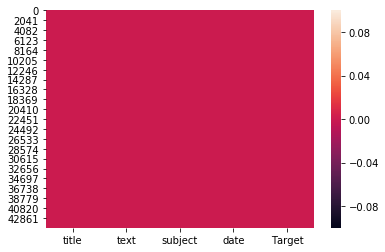

In [27]:
sns.heatmap(df.isnull())

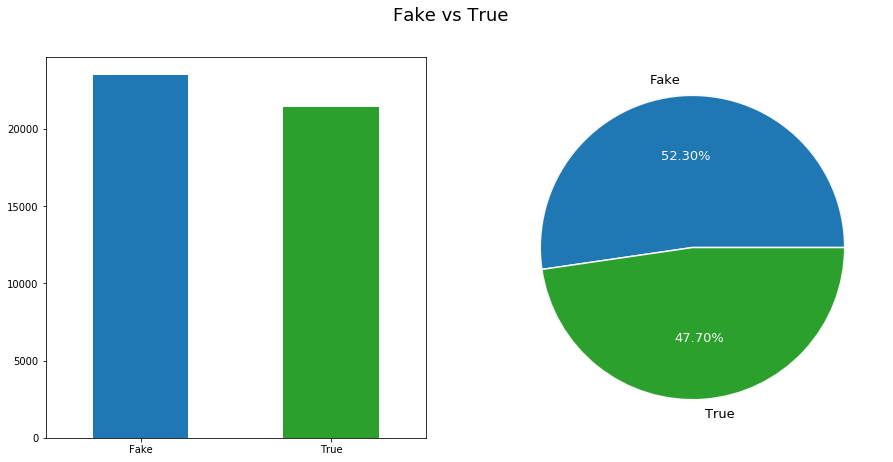

In [28]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Fake vs True", fontsize = 18.)
_ = df.Target.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["Fake", "True"])
_ = df.Target.value_counts().plot.pie(labels = ("Fake", "True"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

In [29]:
import plotly.express as px
sub_tf_df=df.groupby('Target').apply(lambda x:x['title'].count()).reset_index(name='Counts')
sub_tf_df.Target.replace({0:'False',1:'True'},inplace=True)
fig = px.bar(sub_tf_df, x="Target", y="Counts",
             color='Counts', barmode='group',
             height=400)
fig.show()

In [30]:
sub_check=df.groupby('subject').apply(lambda x:x['title'].count()).reset_index(name='Counts')
fig=px.bar(sub_check,x='subject',y='Counts',color='Counts',title='Count of News Articles by Subject')
fig.show()

# Data Cleaning

In [31]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [32]:
#creating instance
lemma=WordNetLemmatizer()

#text cleaning function
def preprocess(text):
    string = ""
    
    #lower casing
    text=text.lower()
    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)
    
    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)
    
    for word in text.split():
        if word not in stop_words:
            string+=lemma.lemmatize(word)+" "
    
    return string

# Corona Misinformation

In [34]:
df_corona.shape

(1164, 4)

In [35]:
df_corona.label.value_counts()

TRUE    584
Fake    345
fake    230
Name: label, dtype: int64

In [36]:
df_corona['label'].replace('TRUE', 1, inplace=True)
df_corona['label'].replace('fake', 0, inplace=True)
df_corona['label'].replace('Fake', 0, inplace=True)

In [37]:
corona_true=df_corona[df_corona['label']==1]

In [38]:
corona_fake=df_corona[df_corona['label']==0]

In [39]:
corona_true.head()

title  \
9   Basic protective measures against the new coro...   
14  Exposing yourself to the sun or to temperature...   
16  Being able to hold your breath for 10 seconds ...   
17  Drinking alcohol does not protect you against ...   
18  COVID-19 virus can be transmitted in areas wit...   

                                                 text  \
9   Stay aware of the latest information on the CO...   
14  You can catch COVID-19, no matter how sunny or...   
16  The most common symptoms of COVID-19 are dry c...   
17  Frequent or excessive alcohol consumption can ...   
18  From the evidence so far, the COVID-19 virus c...   

                                               source  label  
9   https://www.who.int/emergencies/diseases/novel...    1.0  
14  https://www.who.int/emergencies/diseases/novel...    1.0  
16  https://www.who.int/emergencies/diseases/novel...    1.0  
17  https://www.who.int/emergencies/diseases/novel...    1.0  
18  https://www.who.int/emergencies/diseases/novel...    1.0

In [79]:
corona_true.text[25]

'No. Spraying alcohol or chlorine all over your body will not kill viruses that have already entered your body. Spraying such substances can be harmful to clothes or mucous membranes (i.e. eyes, mouth). Be aware that both alcohol and chlorine can be useful to disinfect surfaces, but they need to be used under appropriate recommendations.'

In [77]:
corona_true.text[23]

'UV lamps should not be used to sterilize hands or other areas of skin as UV radiation can cause skin irritation.'

In [41]:
corona_fake.head()

title  \
0  Due to the recent outbreak for the Coronavirus...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                                text  \
0  You just need to add water, and the drugs and ...   
1  Hydroxychloroquine has been shown to have a 10...   
2  Fact: Hydroxychloroquine has been shown to hav...   
3  The Corona virus is a man made virus created i...   
4  Doesn’t @BillGates finance research at the Wuh...   

                      source  label  
0  coronavirusmedicalkit.com    0.0  
1               RudyGiuliani    0.0  
2                CharlieKirk    0.0  
3    JoanneWrightForCongress    0.0  
4    JoanneWrightForCongress    0.0

In [81]:
corona_fake.text[0]

'You just need to add water, and the drugs and vaccines are ready to be administered. There are two parts to the kit: one holds pellets containing the chemical machinery that synthesises the end product, and the other holds pellets containing instructions that telll the drug which compound to create. Mix two parts together in a chosen combination, add water, and the treatment is ready.'

In [43]:
df_corona.isnull().sum()

title     82
text      10
source    20
label      5
dtype: int64

In [44]:
df_corona.dropna(inplace=True)

In [45]:
df_corona.text.isnull().sum()

0

In [46]:
df_corona['clean_text'] = df_corona['text'].apply(preprocess)

In [47]:
df_corona['clean_text']

0       need add water drug vaccine ready administered...
9       stay aware latest information covid 19 outbrea...
14      catch covid 19 matter sunny hot weather countr...
16      common symptom covid 19 dry cough tiredness fe...
17      frequent excessive alcohol consumption increas...
18      evidence far covid 19 virus transmitted area i...
19      reason believe cold weather kill new coronavir...
20      taking hot bath prevent catching covid 19 norm...
21      date information evidence suggest new coronavi...
22      hand dryer effective killing 2019 ncov protect...
23      uv lamp used sterilize hand area skin uv radia...
24      thermal scanner effective detecting people dev...
25      spraying alcohol chlorine body kill virus alre...
26      vaccine pneumonia pneumococcal vaccine haemoph...
27      evidence regularly rinsing nose saline protect...
28      garlic healthy food may antimicrobial property...
29      people age infected new coronavirus 2019 ncov ...
30      antibi

In [83]:
from PIL import Image
import numpy as np

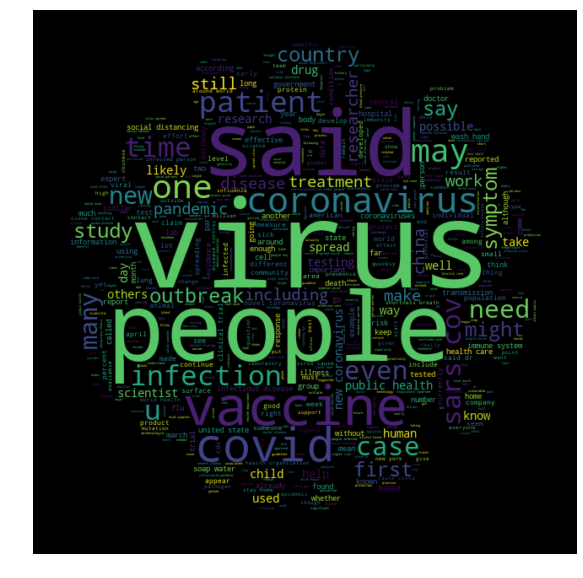

In [89]:
from wordcloud import WordCloud

mask = np.array(Image.open('image-1.jpg'))

true_data = df_corona[df_corona["label"] == 1]
all_words = ' '.join([text for text in true_data.clean_text])

wc = WordCloud(stopwords=STOPWORDS, 
               mask=mask, background_color="black",
               max_words=2000, max_font_size=280,
               random_state=42, width=1000,
               height=800).generate(all_words)

plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

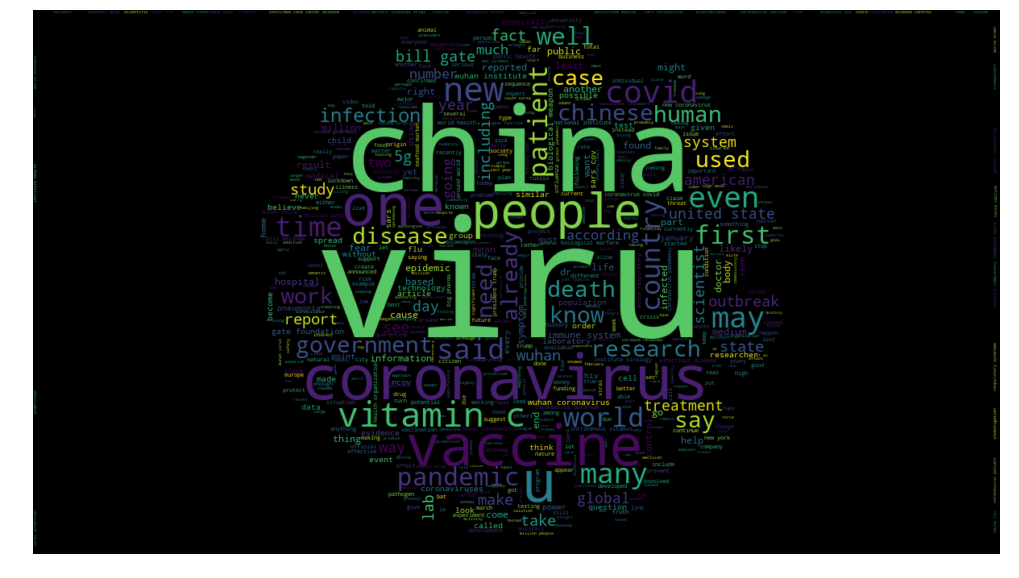

In [57]:
from wordcloud import WordCloud

mask = np.array(Image.open('image.jpg'))

true_data = df_corona[df_corona["label"] == 0]
all_words = ' '.join([text for text in true_data.clean_text])

wc = WordCloud(stopwords=STOPWORDS, 
               mask=mask, background_color="black",
               max_words=2000, max_font_size=256,
               random_state=42, width=1000,
               height=800).generate(all_words)

plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [59]:
df_corona.head()

title  \
0   Due to the recent outbreak for the Coronavirus...   
9   Basic protective measures against the new coro...   
14  Exposing yourself to the sun or to temperature...   
16  Being able to hold your breath for 10 seconds ...   
17  Drinking alcohol does not protect you against ...   

                                                 text  \
0   You just need to add water, and the drugs and ...   
9   Stay aware of the latest information on the CO...   
14  You can catch COVID-19, no matter how sunny or...   
16  The most common symptoms of COVID-19 are dry c...   
17  Frequent or excessive alcohol consumption can ...   

                                               source  label  \
0                           coronavirusmedicalkit.com    0.0   
9   https://www.who.int/emergencies/diseases/novel...    1.0   
14  https://www.who.int/emergencies/diseases/novel...    1.0   
16  https://www.who.int/emergencies/diseases/novel...    1.0   
17  https://www.who.int/emergencies/diseases/novel...    1.0   

                                           clean_text  
0   need add water drug vaccine ready administered...  
9   stay aware latest information covid 19 outbrea...  
14  catch covid 19 matter sunny hot weather countr...  
16  common symptom covid 19 dry cough tiredness fe...  
17  frequent excessive alcohol consumption increas...

In [90]:
df_corona['text'][9]

'Stay aware of the latest information on the COVID-19 outbreak, available on the WHO website and through your national and local public health authority. Most people who become infected experience mild illness and recover, but it can be more severe for others. Take care of your health and protect others by doing the following: Wash your hands frequently. Regularly and thoroughly clean your hands with an alcohol-based hand rub or wash them with soap and water.Why? Washing your hands with soap and water or using alcohol-based hand rub kills viruses that may be on your hands. Maintain social distancing. Maintain at least 1 metre (3 feet) distance between yourself and anyone who is coughing or sneezing. Why? When someone coughs or sneezes they spray small liquid droplets from their nose or mouth which may contain virus. If you are too close, you can breathe in the droplets, including the COVID-19 virus if the person coughing has the disease. Avoid touching eyes, nose and mouth. Why? Hands 

In [57]:
df_corona['clean_text'][9]

'stay aware latest information covid 19 outbreak available website national local public health authority people become infected experience mild illness recover severe others take care health protect others following wash hand frequently regularly thoroughly clean hand alcohol based hand rub wash soap water washing hand soap water using alcohol based hand rub kill virus may hand maintain social distancing maintain least 1 metre 3 foot distance anyone coughing sneezing someone cough sneeze spray small liquid droplet nose mouth may contain virus close breathe droplet including covid 19 virus person coughing disease avoid touching eye nose mouth hand touch many surface pick virus contaminated hand transfer virus eye nose mouth virus enter body make sick practice respiratory hygiene make sure people around follow good respiratory hygiene mean covering mouth nose bent elbow tissue cough sneeze dispose used tissue immediately droplet spread virus following good respiratory hygiene protect pe

# Can the News Headline be enough to predict if the news if fake or not? Lets us see in the following analysis

In [17]:
df['clean_title'] = df['title'].apply(preprocess)
df['clean_title']

0        u budget fight loom republican flip fiscal scr...
1        u military accept transgender recruit monday p...
2          senior u republican senator let mr mueller job 
3        fbi russia probe helped australian diplomat ti...
4        trump want postal service charge much amazon s...
5        white house congress prepare talk spending imm...
6        trump say russia probe fair timeline unclear nyt 
7        factbox trump twitter dec 29 approval rating a...
8                     trump twitter dec 28 global warming 
9        alabama official certify senator elect jones t...
10       jones certified u senate winner despite moore ...
11       new york governor question constitutionality f...
12       factbox trump twitter dec 28 vanity fair hilla...
13                  trump twitter dec 27 trump iraq syria 
14       man say delivered manure mnuchin protest new u...
15       virginia official postpone lottery drawing dec...
16       u lawmaker question businessman 2016 trump tow.

In [23]:
maxlen = -1
for doc in df.title:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in a title is =", maxlen)
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_title], nbins = 50)
fig.show()

The maximum number of words in a title is = 52


# Let's Look at the wordclouds

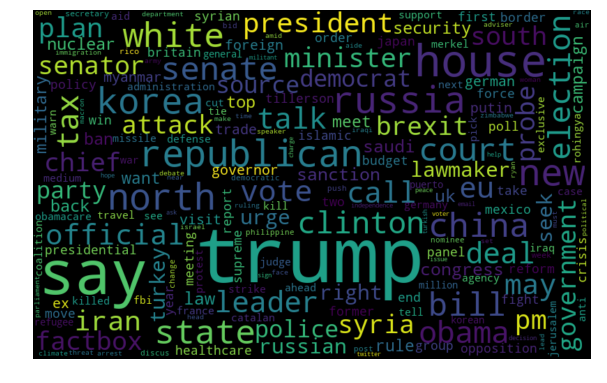

In [37]:
from wordcloud import WordCloud

true_data = df[df["Target"] == 1]
all_words = ' '.join([text for text in true_data.clean_title])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

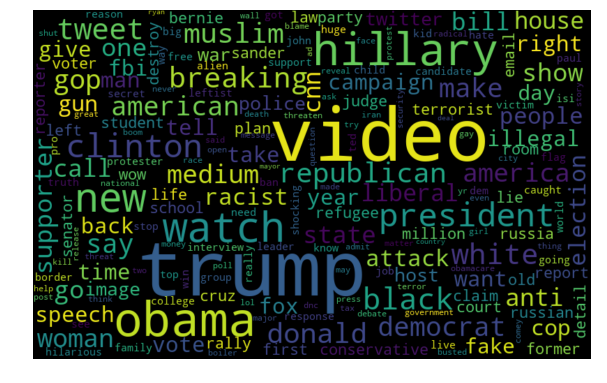

In [35]:
from wordcloud import WordCloud

fake_data = df[df["Target"] == 0]
all_words = ' '.join([text for text in fake_data.clean_title])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Prediction- How much accurately can we predict if the News is True or Fake just from the Title

In [91]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  Target  
0  December 31, 2017        1  
1  December 29, 2017        1  
2  December 31, 2017        1  
3  December 30, 2017        1  
4  December 29, 2017        1

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.clean_title, df.Target, test_size = 0.2,random_state=2)
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)

In [27]:
model = LogisticRegression(C=2)
model.fit(X_vec_train, y_train)
predicted_value = model.predict(X_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.9529620849075194


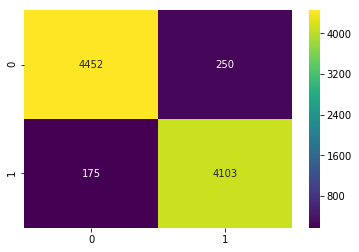

In [29]:
cm = confusion_matrix(list(y_test), predicted_value)
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')

# Let's Check finally with text

In [18]:
df['clean_text'] = df['text'].apply(preprocess)
df['clean_text']

0        washington reuters head conservative republica...
1        washington reuters transgender people allowed ...
2        washington reuters special counsel investigati...
3        washington reuters trump campaign adviser geor...
4        seattle washington reuters president donald tr...
5        west palm beach fla washington reuters white h...
6        west palm beach fla reuters president donald t...
7        following statement posted verified twitter ac...
8        following statement posted verified twitter ac...
9        washington reuters alabama secretary state joh...
10       reuters alabama official thursday certified de...
11       new york washington reuters new u tax code tar...
12       following statement posted verified twitter ac...
13       following statement posted verified twitter ac...
14       dec 25 story second paragraph corrects name st...
15       reuters lottery drawing settle tied virginia l...
16       washington reuters georgian american businessm.

# Check The Word Clouds

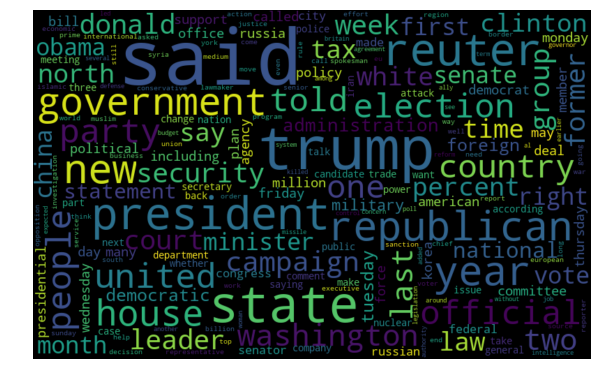

In [41]:
from wordcloud import WordCloud

true_data = df[df["Target"] == 1]
all_words = ' '.join([text for text in true_data.clean_text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

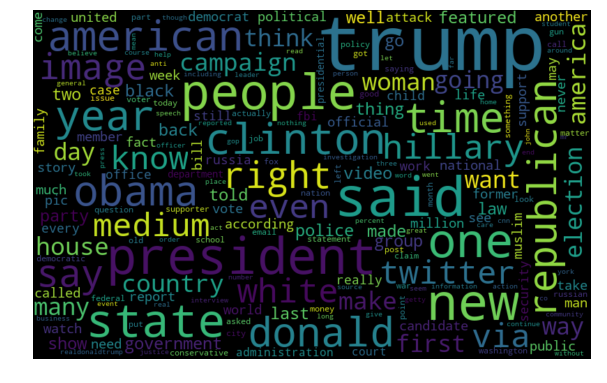

In [42]:
from wordcloud import WordCloud

fake_data = df[df["Target"] == 0]
all_words = ' '.join([text for text in fake_data.clean_text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Lets try to identify the distribution of word counts in the texts

In [43]:
maxlen = -1
for doc in df.clean_text:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in a News Content is =", maxlen)
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_text], nbins = 50)
fig.show()

The maximum number of words in a News Content is = 5061


# Final Predictions

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.clean_text, df.Target, test_size = 0.2,random_state=2)
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)

In [21]:
model = LogisticRegression(C=2.5)
model.fit(X_vec_train, y_train)
y_pred_log = model.predict(X_vec_test)
accuracy_value = roc_auc_score(y_test, y_pred_log)
print(accuracy_value)

0.9960463145301981


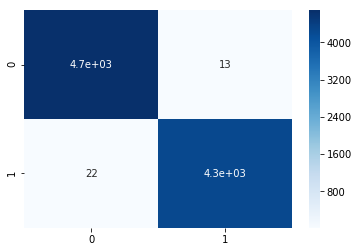

In [51]:
cm = confusion_matrix(list(y_test), predicted_value)
sns.heatmap(cm, annot = True,cmap=plt.cm.Blues)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4702
           1       1.00      0.99      1.00      4278

   micro avg       1.00      1.00      1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [23]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Accuracy  78.47438752783964


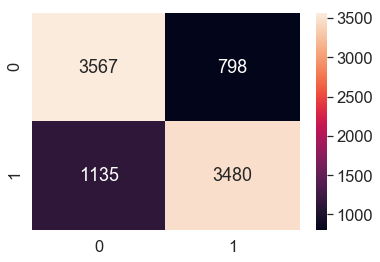

In [24]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(5)

knn.fit(X_vec_train,y_train)
y_pred_KNN=knn.predict(X_vec_test)
#Accuracy
print("Accuracy ", knn.score(X_vec_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred_KNN, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [25]:
SVM=SVC(kernel='linear') 

# fitting x samples and y classes 
SVM.fit(X_vec_train,y_train) 
y_pred_SVM=SVM.predict(X_vec_test)
#Accuracy
print("Accuracy ", SVM.score(X_vec_test, y_test)*100)


Accuracy  99.56570155902004


In [26]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=1000)

In [27]:
classifier.fit(X_vec_train, y_train)

y_pred_passive = classifier.predict(X_vec_test)

accuracy_score(y_test, y_pred_passive)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


0.9934298440979955

In [28]:
MLA=[log_model,knn,SVM,classifier]

In [29]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)
row_index = 0
for alg in MLA:
    predicted = alg.fit(X_vec_train, y_train).predict(X_vec_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Model Name'] = MLA_name
    MLA_compare.loc[row_index, 'Model Accuracy'] = alg.score(X_vec_test, y_test)
    MLA_compare.loc[row_index, 'Model Precision'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Model Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Model Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Model F1-Score'] = f1_score(y_test, predicted)
    row_index+=1
    
MLA_compare.sort_values(by = ['Model Accuracy'], ascending = False, inplace = True)    
MLA_compare

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Model Name  Model Accuracy  Model Precision  Model Recall  \
0           LogisticRegression        0.996102         0.996955      0.994857   
2                          SVC        0.995657         0.996486      0.994390   
3  PassiveAggressiveClassifier        0.992539         0.994830      0.989481   
1         KNeighborsClassifier        0.784744         0.754063      0.813464   

   Model F1-Score  
0        0.995905  
2        0.995437  
3        0.992148  
1        0.782638

In [31]:
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [36]:
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["Model","Accuracy"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[MLA_compare['Model Name'],MLA_compare['Model Accuracy'].round(4)],
               fill = dict(color = ['yellow', 'white']),
               align = ['center'],height=40))

trace1 = go.Bar(x=MLA_compare['Model Name'],
                y=MLA_compare['Model Accuracy'],
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='blue'),opacity=0.60)
layout = dict(
    width=830,
    height=400,
    autosize=False,
    title='Model Accuracy Comparision Among Algorithms',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

In [37]:
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["Model","Precision"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[MLA_compare['Model Name'],MLA_compare['Model Precision'].round(4)],
               fill = dict(color = ['yellow', 'white']),
               align = ['center'],height=40))

trace1 = go.Bar(x=MLA_compare['Model Name'],
                y=MLA_compare['Model Precision'],
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='blue'),opacity=0.60)
layout = dict(
    width=830,
    height=400,
    autosize=False,
    title='Model Precision Comparision Among Algorithms',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

In [38]:
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["Model","Recall"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[MLA_compare['Model Name'],MLA_compare['Model Recall'].round(4)],
               fill = dict(color = ['yellow', 'white']),
               align = ['center'],height=40))

trace1 = go.Bar(x=MLA_compare['Model Name'],
                y=MLA_compare['Model Recall'],
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='blue'),opacity=0.60)
layout = dict(
    width=830,
    height=400,
    autosize=False,
    title='Model Recall Comparision Among Algorithms',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

In [39]:
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["Model","F1-Score"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[MLA_compare['Model Name'],MLA_compare['Model F1-Score'].round(4)],
               fill = dict(color = ['yellow', 'white']),
               align = ['center'],height=40))

trace1 = go.Bar(x=MLA_compare['Model Name'],
                y=MLA_compare['Model F1-Score'],
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='blue'),opacity=0.60)
layout = dict(
    width=830,
    height=400,
    autosize=False,
    title='F1-Score Comparision Among Algorithms',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

# Approach and model saving

In [48]:
messages=df_corona.copy()

In [49]:
messages.reset_index(inplace=True)

In [50]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [51]:
messages.head()

index                                              title  \
0      0  Due to the recent outbreak for the Coronavirus...   
1      9  Basic protective measures against the new coro...   
2     14  Exposing yourself to the sun or to temperature...   
3     16  Being able to hold your breath for 10 seconds ...   
4     17  Drinking alcohol does not protect you against ...   

                                                text  \
0  You just need to add water, and the drugs and ...   
1  Stay aware of the latest information on the CO...   
2  You can catch COVID-19, no matter how sunny or...   
3  The most common symptoms of COVID-19 are dry c...   
4  Frequent or excessive alcohol consumption can ...   

                                              source  label  \
0                          coronavirusmedicalkit.com    0.0   
1  https://www.who.int/emergencies/diseases/novel...    1.0   
2  https://www.who.int/emergencies/diseases/novel...    1.0   
3  https://www.who.int/emergencies/diseases/novel...    1.0   
4  https://www.who.int/emergencies/diseases/novel...    1.0   

                                          clean_text  
0  need add water drug vaccine ready administered...  
1  stay aware latest information covid 19 outbrea...  
2  catch covid 19 matter sunny hot weather countr...  
3  common symptom covid 19 dry cough tiredness fe...  
4  frequent excessive alcohol consumption increas...

In [52]:
import re
import nltk

corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [53]:
len(corpus)

1059

In [54]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [55]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [56]:
X = tfidf_v.fit_transform(corpus).toarray()
y = messages['label']

In [57]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=1000)

In [59]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.943


# Preprocess and transform datapoint and try to predict it based on the model

In [101]:
corona_fake.head(15)

title  \
0   Due to the recent outbreak for the Coronavirus...   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13                                                NaN   
33                                                NaN   
34                                                NaN   
35                                                NaN   

                                                 text  \
0   You just need to add water, and the drugs and ...   
1   Hydroxychloroquine has been shown to have a 10...   
2   Fact: Hydroxychloroquine has been shown to hav...   
3   The Corona virus is a man made virus created i...   
4   Doesn’t @BillGates finance research at the Wuh...   
6   Urgent: Health Bulletin to the Public. Ministr...   
7   Pls tell ur families, relatives and friendsMOH...   
8   SERIOUS EXCELLENT ADVICE by Japanese doctors t...   
10  The new Coronavirus may not show signs of infe...   
11  A vaccine meant for cattle can be used to figh...   
12  Using a hair dryer to breathe in hot air can c...   
13  Corona virus before it reaches the lungs it re...   
33  IMPORTANT ANNOUNCEMENT - CORONAVIRUS\nLast eve...   
34  Drinking hot water with lemons will cure or pr...   
35  Bananas are one of the most popular fruits wor...   

                                      source  label  
0                  coronavirusmedicalkit.com    0.0  
1                               RudyGiuliani    0.0  
2                                CharlieKirk    0.0  
3                    JoanneWrightForCongress    0.0  
4                    JoanneWrightForCongress    0.0  
6                         Ministry of Health    0.0  
7                                     NWLLAB    0.0  
8   Japanese doctors treating COVID-19 cases    0.0  
10                            Taiwan Experts    0.0  
11                                  facebook    0.0  
12                                   Youtube    0.0  
13                                   twitter    0.0  
33                       Peter Lee Goodchild    0.0  
34                                       NaN    0.0  
35                                  facebook    0.0

In [103]:
corona_fake.text[13]

'Corona virus before it reaches the lungs it remains in the throat for four days and at this time the person begins to cough and have throat pains. If he drinks water a lot and gargling with warm water & salt or vinegar eliminates the virus. Spread this information because you can save someone with this information'

In [104]:
review = re.sub('[^a-zA-Z]', ' ', corona_fake['text'][13])
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'corona viru reach lung remain throat four day time person begin cough throat pain drink water lot gargl warm water salt vinegar elimin viru spread inform save someon inform'

In [105]:
val = tfidf_v.transform([review]).toarray()

In [106]:
val

array([[0., 0., 0., ..., 0., 0., 0.]])

In [107]:
classifier.predict(val)

array([0.])

In [70]:
from sklearn.externals import joblib

In [79]:
joblib.dump(classifier, 'model-2.pkl')

['model-2.pkl']

In [80]:
joblib.dump(tfidf_v, 'tfidfvect-2.pkl')

['tfidfvect-2.pkl']

In [81]:
frames_2 = [corona_true.loc[0:10][:], corona_fake.loc[0:10][:]]
df_2 = pd.concat(frames_2)

In [82]:
df_2.to_csv('random_dataset.csv', index=False)